<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Simple Linear Regression with Sacramento Real Estate Data

_Authors: Matt Brems, Sam Stack, Justin Pounders_

---

In this lab you will hone your exploratory data analysis (EDA) skills and practice constructing simple linear regressions using a data set on Sacramento real estate sales.  The data set contains information on qualities of the property, location of the property, and time of sale.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Read in the Sacramento housing data set.

In [2]:
# A: 
sac_csv = './datasets/sacramento_real_estate_transactions.csv'
shd = pd.read_csv(sac_csv)

### 2. Conduct exploratory data analysis on this data set. 

**Report any notable findings here and any steps you take to clean/process data.**

> **Note:** These EDA checks should be done on every data set you handle. If you find yourself checking repeatedly for missing/corrupted data, it might be beneficial to have a function that you can reuse every time you're given new data.

In [3]:
shd.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [4]:
# renaming sq__ft to sq_ft, because i'd prefer to work with it that way.
shd.rename(columns={'sq__ft': 'sq_ft'}, inplace=True)

In [5]:
shd.describe()

,zip,beds,baths,sq_ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,95750.697462,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,85.176072,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,95603.000000,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,95660.000000,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,95762.000000,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,95828.000000,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


>check:  
- negative values for sq__ft  
- negative values for price  
- latitude value of -121  
- longitude value of 38

In [6]:
#checking for entries where price is negative... only returns index row 703
mask = (shd['price'] < 0)
shd[mask]

,street,city,zip,state,beds,baths,sq_ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


>index 703 has bad values for state ('AC'), sq_ft (negative), price (negative), latitude, and longitude (probably switched).

>dropping it from the dataframe since the data appears to have been entered incorrectly and it's only aout 0.01% of the data.

In [8]:
# drop index row 703
shd.drop([703], inplace=True)

In [9]:
shd.describe()

,zip,beds,baths,sq_ft,price,latitude,longitude
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,95750.611789,2.913618,1.777439,1315.253049,234167.841463,38.607670,-121.355832
std,85.176913,1.307175,0.895484,853.416702,138434.220875,0.145494,0.138268
min,95603.000000,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,95660.000000,2.000000,1.000000,951.500000,145000.000000,38.482714,-121.446121
50%,95762.000000,3.000000,2.000000,1304.000000,214375.000000,38.626257,-121.376009
75%,95828.000000,4.000000,2.000000,1718.500000,300000.000000,38.695611,-121.295557
max,95864.000000,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


>obvious bad values for sq ft, price, latitude, and longitude removed now that that row is gone.

In [10]:
shd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 984
Data columns (total 12 columns):
street       984 non-null object
city         984 non-null object
zip          984 non-null int64
state        984 non-null object
beds         984 non-null int64
baths        984 non-null int64
sq_ft        984 non-null int64
type         984 non-null object
sale_date    984 non-null object
price        984 non-null int64
latitude     984 non-null float64
longitude    984 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 99.9+ KB


> no missing values; data types are appropriate except for 'sale_date'. converting it to date_time

In [11]:
# convert 'sale date' column to date_time datatype
shd['sale_date'] = pd.to_datetime(shd['sale_date'])

In [12]:
shd.dtypes

street                                       object
city                                         object
zip                                           int64
state                                        object
beds                                          int64
baths                                         int64
sq_ft                                         int64
type                                         object
sale_date    datetime64[ns, pytz.FixedOffset(-240)]
price                                         int64
latitude                                    float64
longitude                                   float64
dtype: object

_**Fun Fact:** Zip codes often have leading zeros — e.g., 02215 = Boston, MA — which will often get knocked off automatically by many software programs like Python or Excel. You can imagine that this could create some issues. _

### 3. Our goal will be to predict price. List variables that you think qualify as predictors of price in an SLR model. 

**For each of the variables you believe to be a valid potential predictor in an SLR model, generate a plot showing the relationship between the independent and dependent variables.**

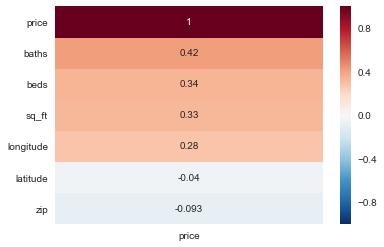

In [13]:
# A:
sns.heatmap(shd.corr().sort_values('price', ascending=False)[['price']], annot=True);

zip, beds, bath, sq_ft, latitude, longitude  
baths has the most significant correlation value, 0.42

In [57]:
def shd_scatter(var1, var2 = 'price'):
    plt.figure(figsize=(11,7))
    plt.scatter(shd[var1], shd[var2])
    plt.title(f'{var1} vs {var2}', fontsize=14)
    plt.xlabel(var1)
    plt.ylabel(var2)

In [61]:
def shd_scatter(x, y = 'price', data = shd):
    plt.figure(figsize=(11,7))
    sns.regplot(x, y, data)
    plt.title(f'{x} vs {y}', fontsize=14)

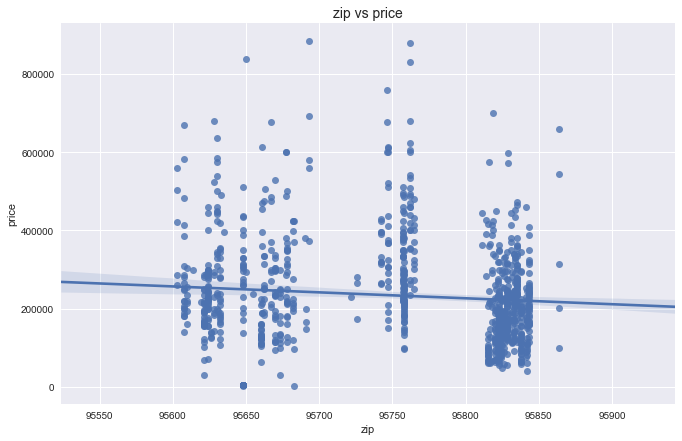

In [62]:
shd_scatter('zip')

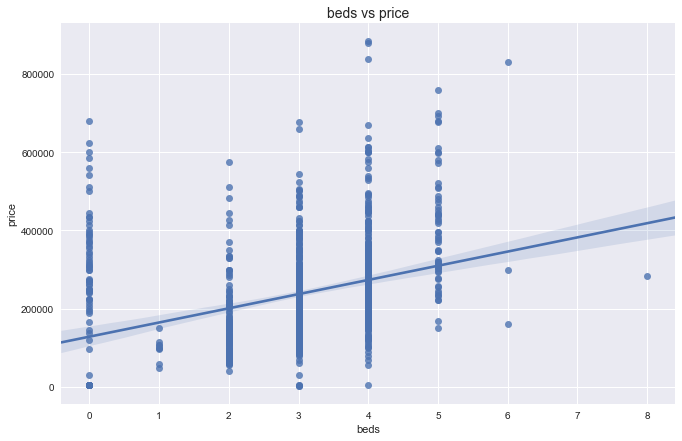

In [64]:
shd_scatter('beds')

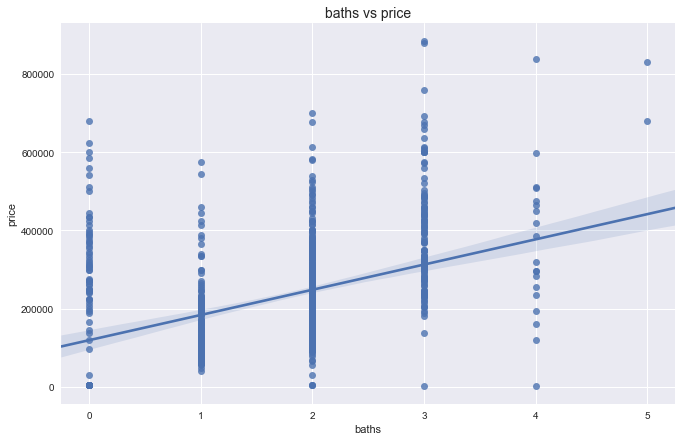

In [65]:
shd_scatter('baths')

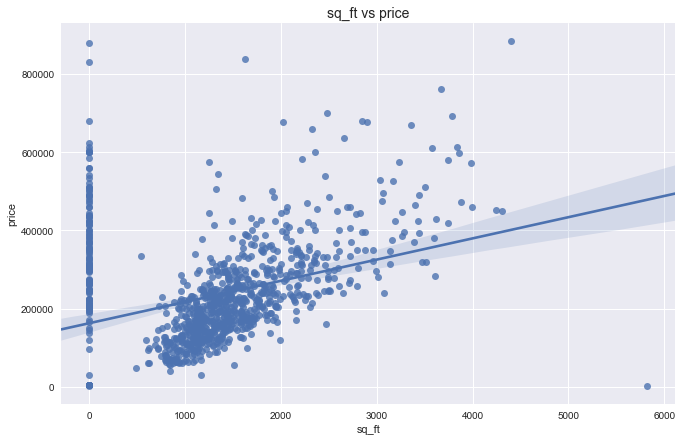

In [66]:
shd_scatter('sq_ft')

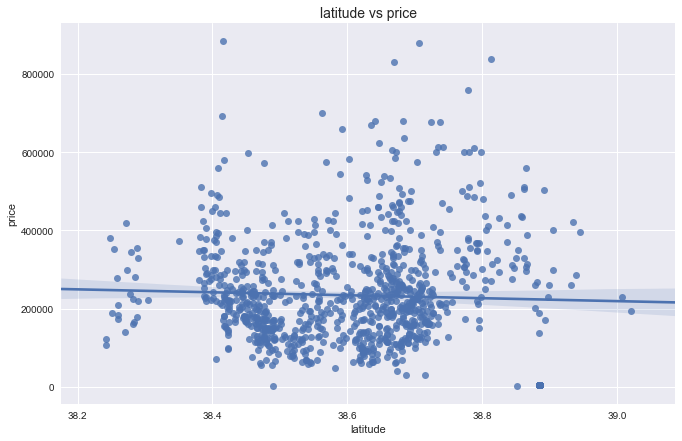

In [67]:
shd_scatter('latitude')

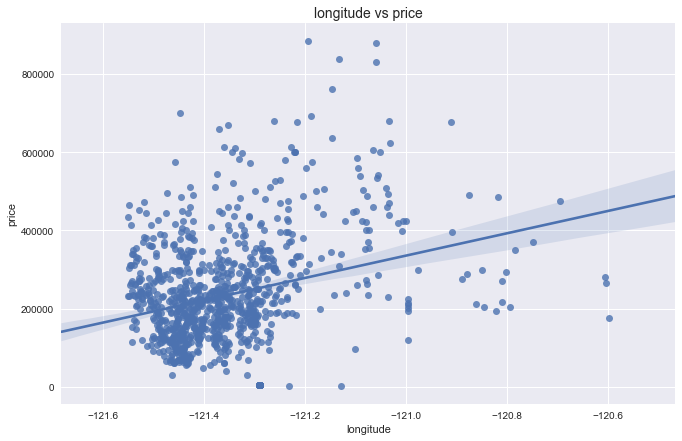

In [68]:
shd_scatter('longitude')

When you've finished cleaning or have made a good deal of progress cleaning, it's always a good idea to save your work.
```python
shd.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')
```

In [21]:
shd.to_csv('./datasets/sacramento_real_estate_transactions_Clean.csv')

### 4. Which variable would be the best predictor of Y in an SLR model? Why?

# A:  
baths, because it has the most significant correlation value, 0.42

### 5. Build a function that will take in two lists, `Y` and `X`, and return the intercept and slope coefficients that minimize SSE. 

`Y` is the target variable and `X` is the predictor variable.

- **Test your function on price and the variable you determined was the best predictor in Problem 4.**
- **Report the slope and intercept.**

In [22]:
# A:
from sklearn import linear_model

def int_slope(X, Y):
    model = linear_model.LinearRegression()
    model.fit(X, Y)
    prediction = model.predict(X)
    print('slope:', model.coef_)
    print('intercept:', model.intercept_)

int_slope(shd[['baths']], shd['price'])

slope: [64344.92072296]
intercept: 119798.66834913296


### 6. Interpret the intercept. Interpret the slope.

 # A:  
 *Intercept*: When 'baths' is equal to zero, the predicted 'price' is about 119,798.67  
 *Slope*: For every unit that 'baths' is increaded, 'price' is expected to increase by about 64,344.92

### 7. Give an example of how this model could be used for prediction and how it could be used for inference. 

**Be sure to make it clear which example is associated with prediction and which is associated with inference.**

# A:

*Prediction*:  
We could predict the price of a property, based on the property's number of baths, by entering the number of baths into the formula **Price = 119798.7 + 64344.9 * Baths**  
Or, we could predict the number of baths a property has, based on the property's price, by entering the price into the derived formula **Baths = (Price - 119798.7) / 64344.9**

*Inference*:  
We could figure out the score of the model.

### 8: [Bonus] Using the model you came up with in Problem 5, calculate and plot the residuals.

In [23]:
# A:

---

> The material following this point can be completed after the second lesson on Monday.

---

## Dummy Variables

---

It is important to be cautious with categorical variables, which represent distict groups or categories, when building a regression. If put in a regression "as-is," categorical variables represented as integers will be treated like *continuous* variables.

That is to say, instead of group "3" having a different effect on the estimation than group "1" it will estimate literally 3 times more than group 1. 

For example, if occupation category "1" represents "analyst" and occupation category "3" represents "barista", and our target variable is salary, if we leave this as a column of integers then barista will always have `beta*3` the effect of analyst.

This will almost certainly force the beta coefficient to be something strange and incorrect. Instead, we can re-represent the categories as multiple "dummy coded" columns.

### 9. Use the `pd.get_dummies` function to convert the `type` column into dummy-coded variables.

Print out the header of the dummy-coded variable output.

In [24]:
# A:
dums = pd.get_dummies(shd['type'])
dums.columns

Index(['Condo', 'Multi-Family', 'Residential', 'Unkown'], dtype='object')

---

### A Word of Caution When Creating Dummies

Let's touch on precautions we should take when dummy coding.

**If you convert a qualitative variable to dummy variables, you want to turn a variable with N categories into N-1 variables.**

> **Scenario 1:** Suppose we're working with the variable "sex" or "gender" with values "M" and "F". 

You should include in your model only one variable for "sex = F" which takes on 1 if sex is female and 0 if sex is not female! Rather than saying "a one unit change in X," the coefficient associated with "sex = F" is interpreted as the average change in Y when sex = F relative to when sex = M.

| Female | Male | 
|-------|------|
| 0 | 1 | 
| 1 | 0 |
| 0 | 1 |
| 1 | 0 |
| 1 | 0 |
_As we can see a 1 in the female column indicates a 0 in the male column. And so, we have two columns stating the same information in different ways._

> Scenario 2: Suppose we're modeling revenue at a bar for each of the days of the week. We have a column with strings identifying which day of the week this observation occured in.

We might include six of the days as their own variables: "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday". **But not all 7 days.**  

|Monday | Tuesday | Wednesday | Thursday | Friday | Saturday | 
|-------|---------|-----------|----------|--------|----------|
| 1     | 0       |0          |      0   |0       | 0        | 
| 0     | 1       |0          |      0   |0       | 0        | 
| 0     | 0       |1          |      0   |0       | 0        | 
| 0     | 0       |0          |      1   |0       | 0        | 
| 0     | 0       |0          |      0   |1       | 0        | 
| 0     | 0       |0          |      0   |0       | 1        | 
| 0     | 0       |0          |      0   |0       | 0        | 

_As humans we can infer from the last row that if its is not Monday, Tusday, Wednesday, Thursday, Friday or Saturday than it must be Sunday. Models work the same way._

The coefficient for Monday is then interpreted as the average change in revenue when "day = Monday" relative to "day = Sunday." The coefficient for Tuesday is interpreted in the average change in revenue when "day = Tuesday" relative to "day = Sunday" and so on.

The category you leave out, which the other columns are *relative to* is often referred to as the **reference category**.

### 10. Remove "Unkown" from four dummy coded variable dataframe and append the rest to the original data.

In [25]:
dums.drop(columns='Unkown', inplace=True)
dums.head()

,Condo,Multi-Family,Residential
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1


In [26]:
dums.sum()

Condo            53
Multi-Family     13
Residential     917
dtype: int64

In [27]:
combined = pd.concat([shd, dums], axis=1)

In [28]:
combined.head()

,street,city,zip,state,beds,baths,sq_ft,type,sale_date,price,latitude,longitude,Condo,Multi-Family,Residential
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,2008-05-21 00:00:00-04:00,59222,38.631913,-121.434879,0,0,1
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,2008-05-21 00:00:00-04:00,68212,38.478902,-121.431028,0,0,1
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,2008-05-21 00:00:00-04:00,68880,38.618305,-121.443839,0,0,1
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,2008-05-21 00:00:00-04:00,69307,38.616835,-121.439146,0,0,1
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,2008-05-21 00:00:00-04:00,81900,38.519470,-121.435768,0,0,1


### 11. Build what you think may be the best MLR model predicting `price`. 

The independent variables are your choice, but *include at least three variables.* At least one of which should be a dummy-coded variable (either one we created before or a new one).

To construct your model don't forget to load in the statsmodels api:

```python
from sklearn.linear_model import LinearRegression

model = LinearRegression()
```

In [29]:
from sklearn.linear_model import LinearRegression

_I'm going to engineer a new dummy variable for 'HUGE houses'.  Those whose square footage is 3 (positive) standard deviations away from the mean._
```
Mean = 1315
STD = 853
Huge Houses > 3775 sq ft
```

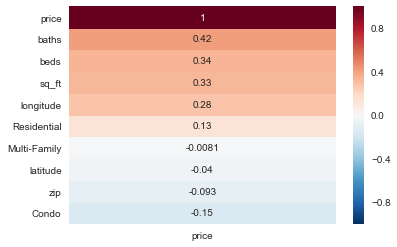

In [30]:
sns.heatmap(combined.corr().sort_values('price', ascending=False)[['price']], annot=True)

In [31]:
y = combined['price']
X = combined[['beds', 'baths', 'Residential']]

In [32]:
lr = LinearRegression()

In [33]:
lr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
preds = lr.predict(X)

### 12. Plot the true price vs the predicted price to evaluate your MLR visually.

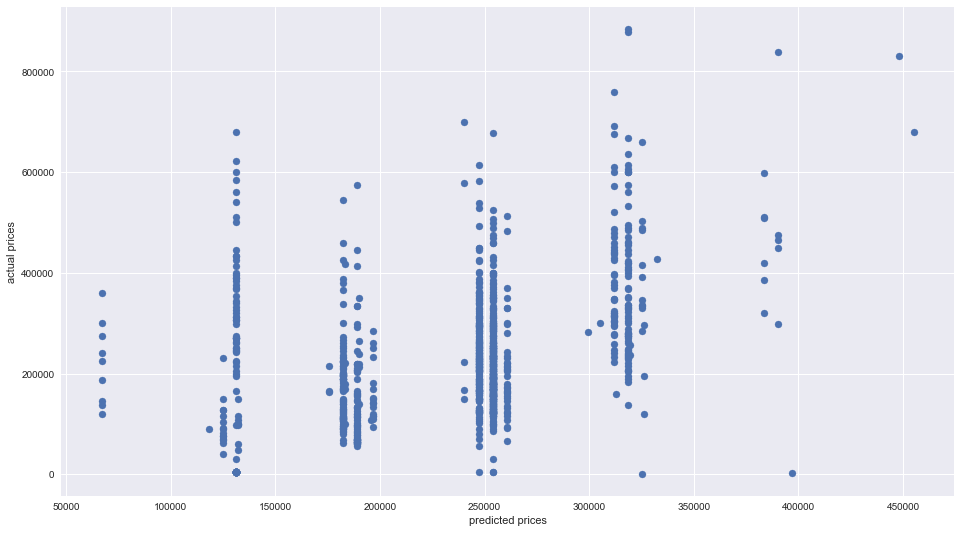

In [71]:
# A:
plt.figure(figsize=(16,9))
plt.scatter(preds, y)
plt.xlabel('predicted prices')
plt.ylabel('actual prices');

### 13. List the five assumptions for an MLR model. 

Indicate which ones are the same as the assumptions for an SLR model. 

**SLR AND MLR**:  

- *Linearity: Y must have an approximately linear relationship with each independent X_i.*
- *Independence: Errors (residuals) e_i and e_j must be independent of one another for any i != j.*
- *Normality: The errors (residuals) follow a Normal distribution.*
- *Equality of Variances: The errors (residuals) should have a roughly consistent pattern, regardless of the value of the X_i. (There should be no discernable relationship between X_1 and the residuals.)*

**MLR ONLY**:  
- *Independence Part 2: The independent variables X_i and X_j must be independent of one another for any i != j*





### 14. Pick at least two assumptions and articulate whether or not you believe them to be met  for your model and why.

# A: 
I think that my model violates the "independence of independent variables" assumption,  
because beds and baths are likely overly correlated.  

I think my model violates the "linearity" assumption, based on the low correlation score of the variable "Residential" to the target "Price", 0.13



### 15. [Bonus] Generate a table showing the point estimates, standard errors, t-scores, p-values, and 95% confidence intervals for the model you built. 

**Write a few sentences interpreting some of the output.**

> **Hint:** scikit-learn does not have this functionality built in, but statsmodels does in the `summary` method.  To fit the statsmodels model use something like the following.  There is one big caveat here, however!  `statsmodels.OLS` does _not_ add an intercept to your model, so you will need to do this explicitly by adding a column filled with the number 1 to your X matrix

```python
import statsmodels.api as sm

# The Default here is Linear Regression (ordinary least squares regression OLS)
model = sm.OLS(y,X).fit()
```

In [36]:
# A:

---

> The material following this point can be completed after the first lesson on Tuesday.

---

### 16. Regression Metrics

Implement a function called `r2_adj()` that will calculate $R^2_{adj}$ for a model. 

In [73]:
len(y)

984

In [144]:
# A:
from sklearn.metrics import r2_score

def r2_adj(X, y):
    p = len(X.columns)      # mumber of predictors
    n = len(y)              # total sample size
    lr = LinearRegression()
    lr.fit(X, y)
    preds = lr.predict(X)
    r2 = r2_score(y, preds)
    return 1 - ((1 - r2) * (n - 1)) / (n - p - 1)

In [145]:
r2_adj(shd[['baths', 'beds']], shd['price'])

0.17173942083759552

### 17. Metrics, metrics, everywhere...

Write a function to calculate and print or return six regression metrics.  Use other functions liberally, including those found in `sklearn.metrics`.

In [38]:
#A:
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, mean_squared_log_error, median_absolute_error

def regr_metrics(y_true, y_pred):
    print('explained_variance_score', explained_variance_score(y_true, y_pred))
    print('mean_absolute_error', mean_absolute_error(y_true, y_pred))
    print('mean_squared_error', mean_squared_error(y_true, y_pred))
    print('mean_squared_log_error', mean_squared_log_error(y_true, y_pred))
    print('median_absolute_error', median_absolute_error(y_true, y_pred))
    print('r2_score', r2_score(y_true, y_pred))
    

### 18. Model Iteration

Evaluate your current home price prediction model by calculating all six regression metrics.  Now adjust your model (e.g. add or take away features) and see how to metrics change.

In [39]:
# A:
regr_metrics(y, preds)

explained_variance_score 0.18646887970827541
mean_absolute_error 94102.0648350655
mean_squared_error 15574693607.77794
mean_squared_log_error 0.8626118796014461
median_absolute_error 78922.86150818496
r2_score 0.1864688797082753


### 19. Bias vs. Variance

At this point, do you think your model is high bias, high variance or in the sweet spot?  If you are doing this after Wednesday, can you provide evidence to support your belief?

# A:  
High Variance  
r2_score close to zero implies high variance